In [1]:
pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 4.6 MB/s eta 0:00:00


In [2]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 

In [1]:
import pandas as pd
import numpy as np
import pythainlp
import gensim
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.j4o6Wndi0U/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.0VFlmKGspy/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.fUeBp0iEsn/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

def driversetup():
    options = webdriver.ChromeOptions()
    #run Selenium in headless mode
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    #overcome limited resource problems
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("lang=en")
    #open Browser in maximized mode
    options.add_argument("start-maximized")
    #disable infobars
    options.add_argument("disable-infobars")
    #disable extension
    options.add_argument("--disable-extensions")
    options.add_argument("--incognito")
    options.add_argument("--disable-blink-features=AutomationControlled")

    driver = webdriver.Chrome(options=options)

    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined});")

    return driver

In [4]:
driver = driversetup()

In [ ]:
#driver.get("https://www.agoda.com/th-th/scent-of-sukhothai-resort/reviews/sukhothai-th.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adults=2&children=0&rooms=1&maxRooms=0&checkIn=2023-08-1&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=1&showReviewSubmissionEntry=false&currencyCode=THB&isFreeOccSearch=false&isCityHaveAsq=false&los=1&searchrequestid=d20a9cff-bc06-454b-a07e-ba39b8578414")

In [ ]:
#reviews = driver.find_elements(By.CLASS_NAME, "Review-comment-bodyTitle")

In [ ]:
#len(reviews)

In [ ]:
#reviews[1].text

In [ ]:
#reviewsBody = driver.find_elements(By.CLASS_NAME, "Review-comment-bodyText")


In [ ]:
#len(reviewsBody)
#reviewsBody[1].text

In [5]:
reviews = []

driver.get("https://www.agoda.com/th-th/scent-of-sukhothai-resort/reviews/sukhothai-th.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adults=2&children=0&rooms=1&maxRooms=0&checkIn=2023-08-1&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=1&showReviewSubmissionEntry=false&currencyCode=THB&isFreeOccSearch=false&isCityHaveAsq=false&los=1&searchrequestid=d20a9cff-bc06-454b-a07e-ba39b8578414")
list_reviews = driver.find_elements(By.CLASS_NAME, "Review-comment-bodyText")[:]
print(len(list_reviews))

for review in list_reviews:
  reviews.append(review.text)

print(reviews)

50
['พนักงานดูแลแนะนำดี ห้องพักค่อนข้างสะอาด จัดโซนดีดูไม่แออัด', 'ที่พักสงบดี', 'ที่พักดี ห้องสะอาด อาหารเช้าทำดีอร่อย ถือว่าคุ้มกับราคาที่จ่าย ใกล้สถานที่ท่องเที่ยว', 'อาคารเก่าดูมีสไสตล์ ตกแต่งสวนสวย ห้องเตียงแฝดเตียงนอนสบาย ห้องน้ำสะอาด อาหารเช้าดี คุ้มค่าเงินมากค่ะ', 'เงียบสงบดีค่ะ มีบริเวณ ทำเลอยู่ใกล้อุทยานประวัติศาสตร์สุโขทัย สะดวกสำหรับมีรถยนต์ส่วนตัว', 'ดีทุกอย่าง เตียงนอนสบายมากกก สะอาด', 'ห้องพักคุ้มค่าราคามาก แนะนำเลย', 'มีโอกาสจะกลับไปพักอีก', 'ที่พักใกล้อุทยาน ผ้าห่มมีขี้จิ้กจกหน่อย เเต่พอรับได้ เพราะห่มนอนไปแล้ว 555 ที่พักมีสระน้ำ ดูสไตล์บ้านไทย สวยมาก ชอบมาก อาหารเช้าอร่อย ลูกสาวชอบมาก', 'ที่พักสะอาด สงบ ใกล้แหล่งท่องเที่ยว พนักงานห้องอาหารพูดเพราะ ทักทายลูกค้ายิ้มแย้ม แต่ขอติพนักงานหน้าfrontพูดจาไม่ดี เราเข้าพัก19.20ถามเราทำไมเข้าพักช้า ใช่เรื่องที่ต้องถามหรือปล่าว เราต้องตอบเค้าใช่ไหมว่าเราไปไหนมา เค้าเป็นใคร?', 'ห้องพักสะอาด บรรยากาศเป็นส่วนตัว', 'ที่พักสะอาด สวยงาม อาหารดี สระว่ายน้ำเยี่ยม ใกล้อุทยาน', 'ดีค่ะ สะอาด บรรยากาศดี', 'ที่พักสวย บรรยากาศดี ห้องพักสวย ทำเล

# **Preparing data**

In [6]:
df = pd.DataFrame(reviews, columns=["review"])
df.head()

,review
0,พนักงานดูแลแนะนำดี ห้องพักค่อนข้างสะอาด จัดโซน...
1,ที่พักสงบดี
2,ที่พักดี ห้องสะอาด อาหารเช้าทำดีอร่อย ถือว่าคุ...
3,อาคารเก่าดูมีสไสตล์ ตกแต่งสวนสวย ห้องเตียงแฝดเ...
4,เงียบสงบดีค่ะ มีบริเวณ ทำเลอยู่ใกล้อุทยานประวั...


In [37]:
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = [' ','  ','\n','(',')','สุโขทัย','รร','โรงแรม','ค่ะ','คะ','ๆ','มี','และ','รร.','ลูกค้า','ๆๆ','ค่','-','ประวัติศาสตร์']
screening_words = stopwords + removed_words

existing_words = set(thai_words())
#add_dict = {'อุทยานประวัติศาสตร์':'อุทยานประวัติศาสตร์','อุทยานประวัติศาสตร์สุโขทัย':'อุทยานประวัติศาสตร์','ราคา': 'ราคา','ปาท่องโก๋': 'ปาท่องโก๋','คุ้มค่า':'คุ้มค่า','สงบ':'สงบ','สไสตล์':'สไตล์','มากกก':'มาก','ไม่มี':'ไม่มี','รถส่วนตัว':'รถส่วนตัว','แหล่งท่งเที่ยว':'แหล่งท่องเที่ยว','สะพานบุญ':'สะพานบุญ','ไม่ได้':'ไม่ได้','อีกรอบ':'อีกรอบ'}
words = {'อุทยาน','ราคา','ปาท่องโก๋','คุ้มค่า','สงบ','สไสตส์','มากกก','ไม่มี','รถส่วนตัว','แหล่งท่งเที่ยว','สะพานบุญ','ไม่ได้','อีกรอบ','เหใาะสม','อพำนวย','สงบดี','ราคาที่'}
custom_dict = existing_words.union(words)

custom_dictionary_trie = Trie(custom_dict)

def tokenize_with_comma(sentence):
  merged = ''
  words = pythainlp.word_tokenize(str(sentence), engine = 'newmm',custom_dict = custom_dictionary_trie)
  print(words)
  for word in words:
    if word not in screening_words:
      merged = merged + ',' + word
  return merged[1:]

In [38]:
df['Review_tokenized'] = df['review'].apply(lambda x: tokenize_with_comma(x))
df.tail()

['พนักงาน', 'ดูแล', 'แนะนำ', 'ดี', ' ', 'ห้องพัก', 'ค่อนข้าง', 'สะอาด', ' ', 'จัด', 'โซน', 'ดี', 'ดู', 'ไม่', 'แออัด']
['ที่พัก', 'สงบดี']
['ที่พัก', 'ดี', ' ', 'ห้อง', 'สะอาด', ' ', 'อาหารเช้า', 'ทำดี', 'อร่อย', ' ', 'ถือว่า', 'คุ้ม', 'กับ', 'ราคาที่', 'จ่าย', ' ', 'ใกล้', 'สถานที่ท่องเที่ยว']
['อาคาร', 'เก่า', 'ดู', 'มี', 'ส', 'ไส', 'ตล์', ' ', 'ตกแต่ง', 'สวน', 'สวย', ' ', 'ห้อง', 'เตียง', 'แฝด', 'เตียงนอน', 'สบาย', ' ', 'ห้อง', 'น้ำสะอาด', ' ', 'อาหารเช้า', 'ดี', ' ', 'คุ้ม', 'ค่าเงิน', 'มาก', 'ค่ะ']
['เงียบ', 'สงบดี', 'ค่ะ', ' ', 'มี', 'บริเวณ', ' ', 'ทำเล', 'อยู่', 'ใกล้', 'อุทยาน', 'ประวัติศาสตร์', 'สุโขทัย', ' ', 'สะดวก', 'สำหรับ', 'มี', 'รถยนต์', 'ส่วนตัว']
['ดี', 'ทุกอย่าง', ' ', 'เตียงนอน', 'สบาย', 'มากกก', ' ', 'สะอาด']
['ห้องพัก', 'คุ้มค่า', 'ราคา', 'มาก', ' ', 'แนะนำ', 'เลย']
['มีโอกาส', 'จะ', 'กลับ', 'ไป', 'พัก', 'อีก']
['ที่พัก', 'ใกล้', 'อุทยาน', ' ', 'ผ้าห่ม', 'มี', 'ขี้', 'จิ้กจก', 'หน่อย', ' ', 'เเต่พอ', 'รับได้', ' ', 'เพราะ', 'ห่ม', 'นอน', 'ไป', 'แล้ว', ' ', '555',

,review,Review_tokenized
45,ห้องพักสวยมาก มีโอกาสจะกลับพักอีกรอบ,"ห้องพัก,สวย,มีโอกาส,พัก,อีกรอบ"
46,พนักงานผู้หญิงตรงเคาน์เตอร์รับลูกค้า บริการไม่...,"พนักงาน,ผู้หญิง,เคาน์เตอร์,บริการ,ดี,พูดจา,แย่..."
47,ห้องพักสะอาด เงียบสงบ อาหารเช้าดี สมราคา,"ห้องพัก,สะอาด,เงียบสงบ,อาหารเช้า,ดี,สมราคา"
48,ห้องพักสะอาด บริการดี,"ห้องพัก,สะอาด,บริการ,ดี"
49,ดี,ดี


Create Dictionary

In [39]:
documents = df['Review_tokenized'].to_list()
texts = [[text for text in doc.split(',')] for doc in documents]
dictionary = gensim.corpora.Dictionary(texts)
print(dictionary.token2id.keys())

dict_keys(['ดี', 'ดู', 'ดูแล', 'พนักงาน', 'สะอาด', 'ห้องพัก', 'แนะนำ', 'แออัด', 'โซน', 'ที่พัก', 'สงบดี', 'คุ้ม', 'จ่าย', 'ทำดี', 'ราคาที่', 'สถานที่ท่องเที่ยว', 'ห้อง', 'อร่อย', 'อาหารเช้า', 'ค่าเงิน', 'ตกแต่ง', 'ตล์', 'น้ำสะอาด', 'ส', 'สวน', 'สวย', 'อาคาร', 'เก่า', 'เตียง', 'เตียงนอน', 'แฝด', 'ไส', 'ทำเล', 'บริเวณ', 'รถยนต์', 'สะดวก', 'สำหรับ', 'ส่วนตัว', 'อุทยาน', 'เงียบ', 'มากกก', 'คุ้มค่า', 'ราคา', 'พัก', 'มีโอกาส', '555', 'ขี้', 'จิ้กจก', 'ชอบ', 'นอน', 'บ้าน', 'ผ้าห่ม', 'รับได้', 'ลูกสาว', 'สระน้ำ', 'สไตล์', 'ห่ม', 'เเต่พอ', 'ไทย', '19.20', '?', 'front', 'ตอบ', 'ติ', 'ถาม', 'ทักทาย', 'พูดจา', 'ยิ้มแย้ม', 'สงบ', 'หน้า', 'หรือปล่าว', 'ห้องอาหาร', 'เค้า', 'เรื่อง', 'แหล่งท่องเที่ยว', 'บรรยากาศ', 'สระว่ายน้ำ', 'สวยงาม', 'อาหาร', 'เยี่ยม', 'ดีมาก', 'ที่จอดรถ', '/', '10', '2', '3', '9.2', 'deluxe', 'คน', 'ความคาดหมาย', 'ซุ่ง', 'ที่นี่', 'น่ารัก', 'อพำนวย', 'เบา', 'เลือก', 'เหใาะสม', 'โอ', 'ไม่มี', 'ค้าง', 'บริการ', 'เหมาะสม', 'นุ่ม', 'กาแฟ', 'ขนมปัง', 'คิดเงิน', 'นม', 'น้ำส้ม', 'ปลอดภั

In [40]:
gensim_corpus = [dictionary.doc2bow(text, allow_update=True) for text in texts]
word_frequencies = [[(dictionary[id],frequence) for id, frequence in couple] for couple in gensim_corpus]

Topic Modeling

In [45]:
num_topics = 50
chunksize = 4000
passes = 20
iterations = 50
eval_every = 1

temp = dictionary[0]
id2word = dictionary.id2token

#%time model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations, num_topics = num_topics, passes=passes, eval_every=eval_every)

CPU times: user 855 ms, sys: 0 ns, total: 855 ms
Wall time: 1.17 s


In [72]:
from gensim import models

n_topics = 3
model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics, id2word=id2word, chunksize=chunksize, alpha = 'auto', eta = 'auto', iterations=iterations,passes=passes,eval_every=eval_every)
#model = models.LdaModel(corpus=gensim_corpus, num_topics=n_topics)

In [75]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, gensim_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.081571 -0.048827       1        1  35.48536
0     -0.090572 -0.035585       2        1  35.30386
2      0.009001  0.084412       3        1  29.21078, topic_info=         Term       Freq      Total Category  logprob  loglift
0          ดี  24.000000  24.000000  Default  30.0000  30.0000
43        พัก  11.000000  11.000000  Default  29.0000  29.0000
16       ห้อง  12.000000  12.000000  Default  28.0000  28.0000
100    บริการ   4.000000   4.000000  Default  27.0000  27.0000
75   บรรยากาศ   6.000000   6.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
77     สวยงาม   0.879948   4.152817   Topic3  -5.2288  -0.3210
137       จอง   0.879858   4.854042   Topic3  -5.2289  -0.4772
80      ดีมาก   0.879759   6.257663   Topic3  -5.2290  -0.7313
95      เลือก   0.879756   2.048653   Topic3  -5.2290   0.3853
14    ราคาที่   0.879742   2.048653   Topic3  -5.2290   0.3853

[182 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
82        3  0.742206         /
169       1  0.719927         1
83        3  0.742206        10
84        3  0.742206         2
113       2  0.720008        24
...     ...       ...       ...
167       2  0.720008       โก๋
97        3  0.742206        โอ
123       1  0.579402  ไปเที่ยว
123       3  0.289701  ไปเที่ยว
31        2  0.720009        ไส

[177 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [76]:
model.show_topic(0)


[('ห้อง', 0.036522243),
 ('อาหารเช้า', 0.026219195),
 ('ที่พัก', 0.025918342),
 ('ห้องพัก', 0.022492241),
 ('สะอาด', 0.022481052),
 ('จอง', 0.018849635),
 ('อร่อย', 0.015313939),
 ('อุทยาน', 0.015312555),
 ('ดี', 0.01182555),
 ('คุ้ม', 0.011782272)]

In [77]:
model.show_topic(1)


[('ดี', 0.07851385),
 ('ที่พัก', 0.043388378),
 ('สะอาด', 0.03974864),
 ('ห้องพัก', 0.031072002),
 ('อุทยาน', 0.029318683),
 ('สวย', 0.02579812),
 ('พัก', 0.022281632),
 ('ดีมาก', 0.022279117),
 ('บริการ', 0.018758994),
 ('พนักงาน', 0.0152453305)]

In [79]:
model.show_topic(2)


[('สะอาด', 0.041558832),
 ('ดี', 0.037515566),
 ('พัก', 0.03750563),
 ('ห้อง', 0.02545613),
 ('ห้องพัก', 0.023325808),
 ('บรรยากาศ', 0.021435106),
 ('อาหารเช้า', 0.017416675),
 ('พนักงาน', 0.017410139),
 ('ราคา', 0.016188404),
 ('กาแฟ', 0.013396351)]

In [78]:
model.show_topic(3)

IndexError: ignored

In [80]:
df['topics'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][0])
df['score'] = df['Review_tokenized'].apply(lambda x: model.get_document_topics(dictionary.doc2bow(x.split(',')))[0][1])

In [81]:
from google.colab import drive
drive.mount('/content/drive')
gdrive_path = "/content/drive" + "/My Drive" + "/Colab Notebooks/Workshop 6/"
result = gdrive_path + 'TopicModeling.xlsx'
with pd.ExcelWriter(result) as writer:
      df.to_excel(writer, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **WordCloud**

In [82]:
from wordcloud import WordCloud

In [83]:
long_string = ','.join(list(df['Review_tokenized'].values))
wordcloud = WordCloud(font_path = gdrive_path + 'TH Sarabun New Regular.ttf',background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=2400, height=1000)
wordcloud.generate(long_string)

In [84]:
print(long_string)

พนักงาน,ดูแล,แนะนำ,ดี,ห้องพัก,สะอาด,โซน,ดี,ดู,แออัด,ที่พัก,สงบดี,ที่พัก,ดี,ห้อง,สะอาด,อาหารเช้า,ทำดี,อร่อย,คุ้ม,ราคาที่,จ่าย,สถานที่ท่องเที่ยว,อาคาร,เก่า,ดู,ส,ไส,ตล์,ตกแต่ง,สวน,สวย,ห้อง,เตียง,แฝด,เตียงนอน,ห้อง,น้ำสะอาด,อาหารเช้า,ดี,คุ้ม,ค่าเงิน,เงียบ,สงบดี,บริเวณ,ทำเล,อุทยาน,สะดวก,สำหรับ,รถยนต์,ส่วนตัว,ดี,เตียงนอน,มากกก,สะอาด,ห้องพัก,คุ้มค่า,ราคา,แนะนำ,มีโอกาส,พัก,ที่พัก,อุทยาน,ผ้าห่ม,ขี้,จิ้กจก,เเต่พอ,รับได้,ห่ม,นอน,555,ที่พัก,สระน้ำ,ดู,สไตล์,บ้าน,ไทย,สวย,ชอบ,อาหารเช้า,อร่อย,ลูกสาว,ชอบ,ที่พัก,สะอาด,สงบ,แหล่งท่องเที่ยว,พนักงาน,ห้องอาหาร,ทักทาย,ยิ้มแย้ม,ติ,พนักงาน,หน้า,front,พูดจา,ดี,พัก,19.20,ถาม,พัก,เรื่อง,ถาม,หรือปล่าว,ตอบ,เค้า,เค้า,?,ห้องพัก,สะอาด,บรรยากาศ,ส่วนตัว,ที่พัก,สะอาด,สวยงาม,อาหาร,ดี,สระว่ายน้ำ,เยี่ยม,อุทยาน,ดี,สะอาด,บรรยากาศ,ดี,ที่พัก,สวย,บรรยากาศ,ดี,ห้องพัก,สวย,ทำเล,ดีมาก,อุทยาน,ที่จอดรถ,อาหารเช้า,พัก,3,ความคาดหมาย,ที่นี่,ห้อง,ดีมาก,พัก,2,คน,เลือก,deluxe,พัก,ห้อง,โอ,อาหารเช้า,เบา,ซุ่ง,เหใาะสม,ราคา,ห้องพัก,พนักงาน,น่ารัก,ไม่มี,อพำนวย,คุ้มค่า,พัก,9.2,/,10,ที่พัก,สวย,ดี,สะอา

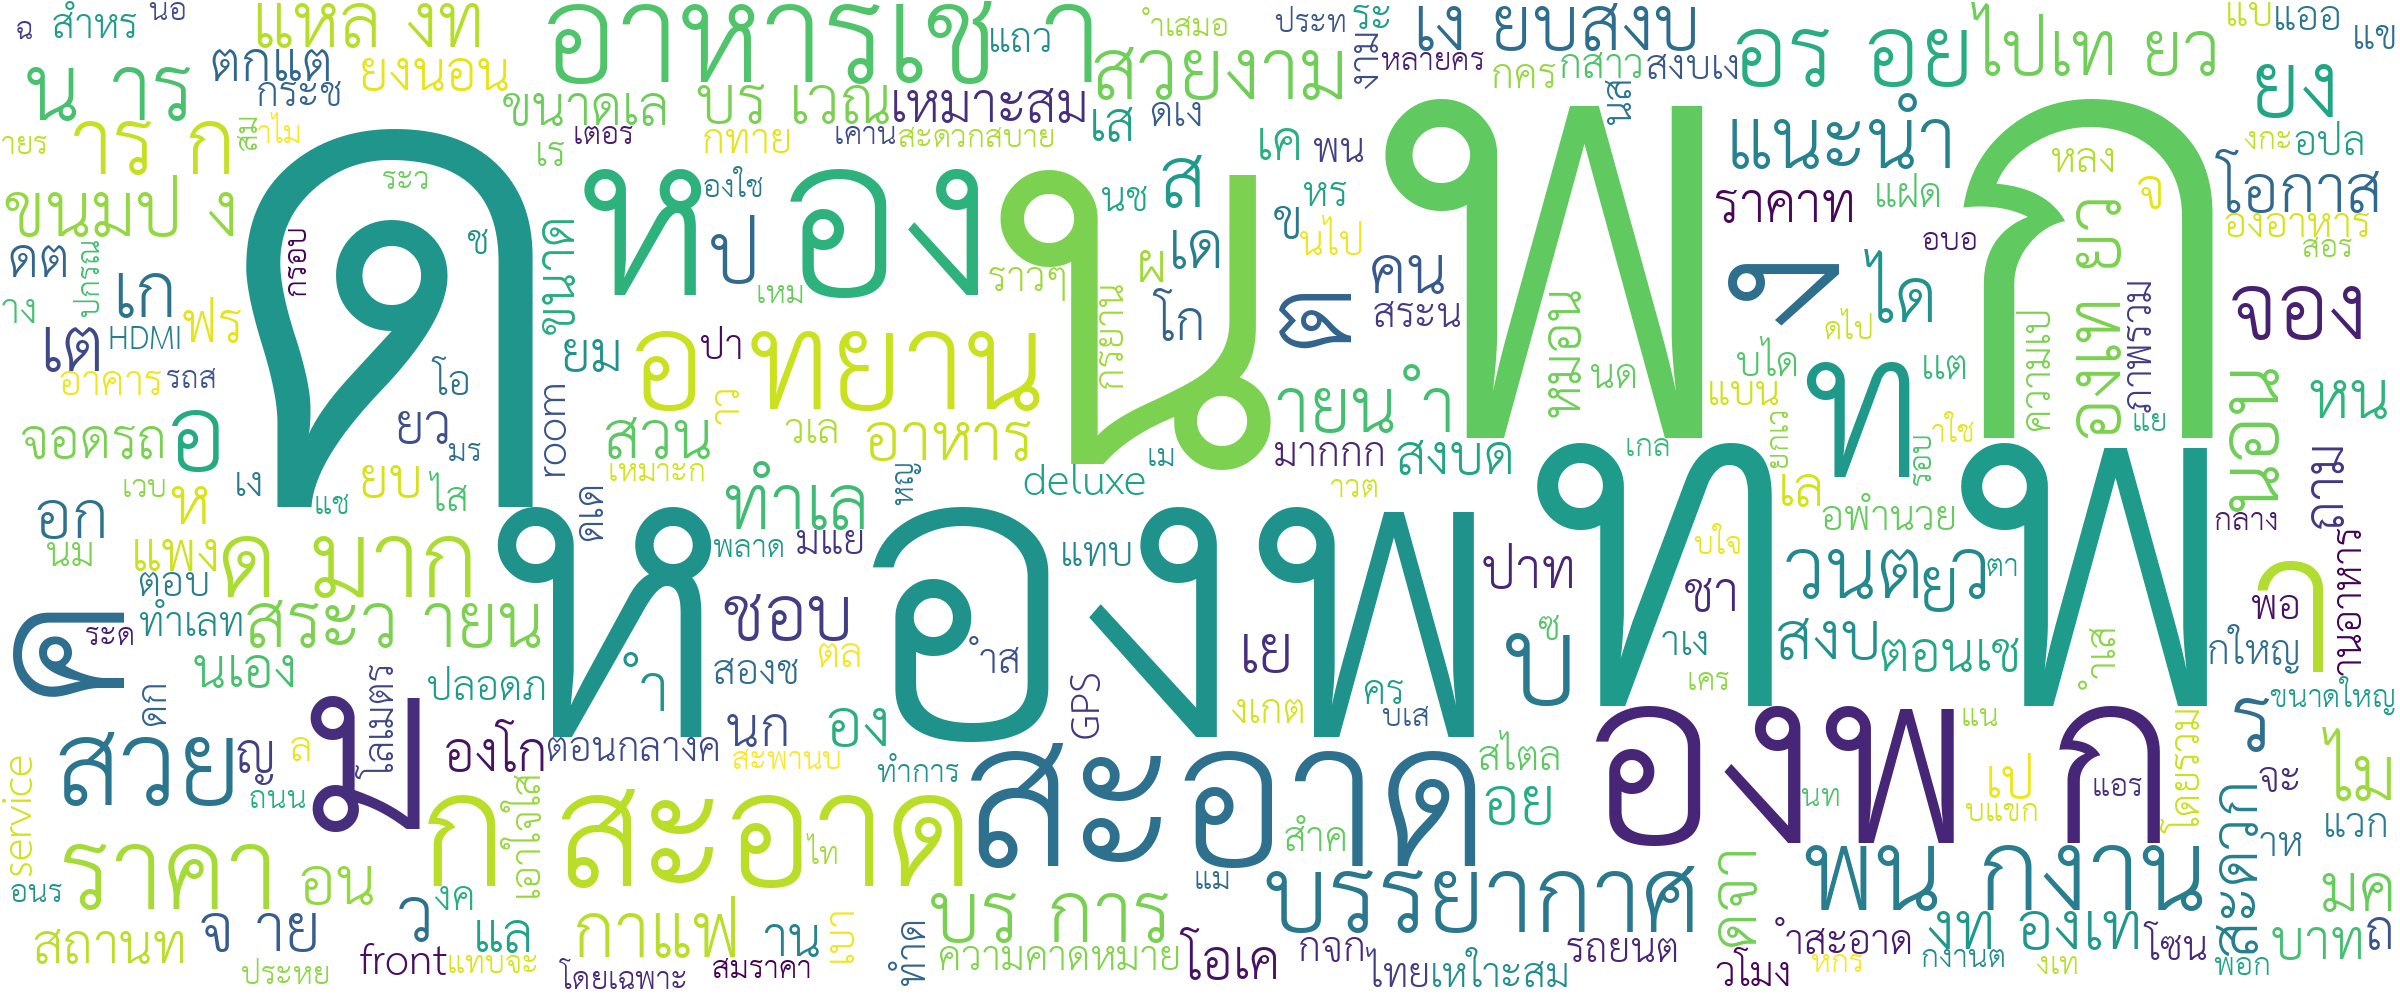

In [85]:
wordcloud.to_image()